In [ ]:
# Organize the data
# Sort missing values
# Change to numerical
# Split the data
# Instantiate the model
# Make predictions

In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from joblib import dump, load
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dtypes

In [ ]:
data.dropna(subset="Price", inplace=True)

In [ ]:
data.isna().sum()

In [ ]:
X = data.drop("Price", axis=1)
y = data["Price"]

In [ ]:
cat_features = ["Make", "Colour"]
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")

door_features = ["Doors"]
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

odo_features = ["Odometer (KM)"]
odo_imputer = SimpleImputer(strategy="mean")

one_hot = OneHotEncoder()

transformer = ColumnTransformer([
    ("cat", cat_imputer, cat_features),
    ("door", door_imputer, door_features),
    ("odo", odo_imputer, odo_features)
])

In [ ]:
transformed_X = transformer.fit_transform(X)

In [ ]:
X_df = pd.DataFrame(data=transformed_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [ ]:
X_df.head()

In [ ]:
one_hot = OneHotEncoder()

column_data = ["Make", "Colour", "Doors", "Odometer (KM)"]
transformer = ColumnTransformer([
    ("one_hot", one_hot, column_data)
], sparse_threshold=0, remainder="passthrough")

In [ ]:
transformed_X = transformer.fit_transform(X_df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor(n_jobs=-1).fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
model.get_params()

In [ ]:
X_df.isna().sum()

In [ ]:
param_distributions = {
    "n_estimators": [100, 400, 700, 1000, 1200],
    "max_depth": [2, 6, 10, 14],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [2, 4, 6, 8, 10],
    "max_features": [2, 4, 6, 8, 10],
}

rs_model = RandomizedSearchCV(model, param_distributions, n_iter=20, cv=5, verbose=2).fit(X_test, y_test)

In [ ]:
rs_model.best_params_

In [ ]:
rs_model.score(X_test, y_test)

In [ ]:
dump(rs_model, filename="test.joblib")

# Try using Pipline()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from joblib import dump, load

In [ ]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.isna().sum()

In [ ]:
data.dropna(subset="Price", inplace=True)
data.isna().sum()

In [ ]:
cat_features = ["Make", "Colour"]
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

odometer_feature = ["Odometer (KM)"]
odometer_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ("cat_imputer", cat_transformer, cat_features),
    ("door_imputer", door_transformer, door_feature),
    ("odometer_imputer", odometer_transformer, odometer_feature)
])

In [ ]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_jobs=-1))
])

In [ ]:
X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
pipe_grid = {
#     "preprocessor__num__imputer__strategy": ['most_frequent','mean', 'median'], # note the double underscore after each prefix "preprocessor__"
    "model__n_estimators": [800],
    "model__max_depth": [3],
    "model__max_features": [12],
    "model__min_samples_split": [6]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2, n_jobs=-1)

In [ ]:
gs_model.fit(X_test, y_test)

In [ ]:
gs_model.score(X_test, y_test)

In [ ]:
gs_model.best_params_

In [ ]:
dump(gs_model, "gs_RandomForstRegressor.joblib")

In [ ]:
# Try heart disease data

In [ ]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

In [ ]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
clf.get_params()

In [ ]:
grid = {
    "max_depth": [2, 4, 6, 8, 10],
    "max_features": [2, 4, 6, 8, 10],
    "max_leaf_nodes": [2, 4, 6, 8, 10],
    "min_samples_leaf": [2, 4, 6, 8, 10],
    "min_samples_split": [2, 4, 6, 8, 10],
    "n_estimators": [100, 200, 500, 800, 1000, 1200]
}

rs_clf = RandomizedSearchCV(clf, grid, cv=5, n_iter=50, n_jobs=-1, verbose=1).fit(X_train, y_train)

In [ ]:
rs_clf.best_params_

In [ ]:
rs_clf.score(X_test, y_test)

In [ ]:
dump(rs_clf, "rs_clf.joblib")

In [40]:
# Plot something

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


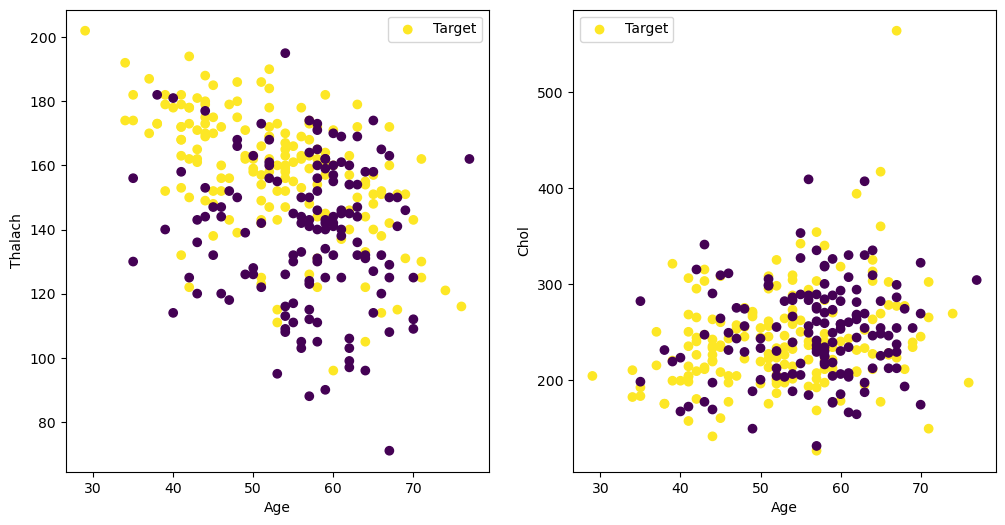

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True)

ax1.scatter(heart_disease["age"], heart_disease["thalach"], c=heart_disease["target"])

ax1.legend(["Target"])
ax1.set(ylabel="Thalach", xlabel="Age")


ax2.scatter(heart_disease["age"], heart_disease["chol"], c=heart_disease["target"])
ax2.legend(["Target"])
ax2.set(xlabel="Age", ylabel="Chol");

In [18]:
# Try another data set
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
iris_df["target"] = pd.Series(iris["target"])

X = iris_df.drop("target", axis=1)
y = iris_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestRegressor().fit(X_train, y_train)
clf.score(X_test, y_test)

0.9305053191489362

In [19]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [23]:
grid = {
    "max_depth": [2, 5, 7, 9, 12, 18],
    "max_features": [2, 5, 7, 9, 12, 18],
    "max_leaf_nodes": [2, 5, 7, 9, 12, 18],
    "min_samples_leaf": [2, 5, 7, 9, 12, 18],
    "min_samples_split": [2, 5, 7, 9, 12, 18],
    "n_estimators": [100, 300, 500, 800, 1000]
}

rs_clf = RandomizedSearchCV(clf, grid, n_iter=50, n_jobs=-1, cv=5,).fit(X_train, y_train)

In [24]:
rs_clf.score(X_test, y_test)

0.9323602090468806